Introduction to regression with neural network in tensorflow

There are many definitions for a regression problem, but in our case, we are going to simply it : predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [ ]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


##Create data to view and fit

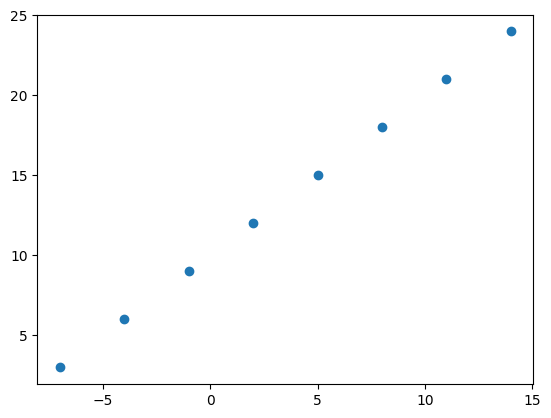

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0 ])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X,y);


In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and output shapes

In [ ]:
#Create a demo tensor for housig price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price= tf.constant([987500])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([987500], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
#turn our numpy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#when there is no dimension, they are scalar
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

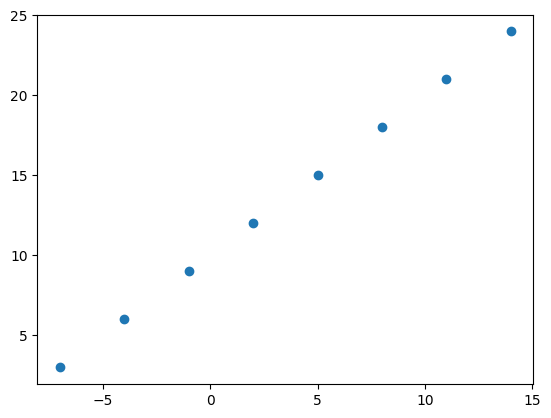

In [ ]:
plt.scatter(X,y)

##Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layer, as well as the hidden layer of a deep learning model

2. **Compiling a model** - define the loss function(in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics
(what we can use to interpret the performance of our model)

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [ ]:
# Another way to add layers
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

In [ ]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
   # you can also write it again tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is the short form of mean absolute error
            optimizer= tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
            metrics = ["mae"])
#Reshape X to be 2D
X_reshaped = tf.reshape(X, shape = (8,1))



# 3. Fit the model
model.fit(X_reshaped,y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 22.0559 - mae: 22.0559
Epoch 2/5
1/1 [==============================] - 0s 38ms/step - loss: 21.6628 - mae: 21.6628
Epoch 3/5
1/1 [==============================] - 0s 27ms/step - loss: 21.2696 - mae: 21.2696
Epoch 4/5
1/1 [==============================] - 0s 26ms/step - loss: 20.8765 - mae: 20.8765
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 20.4994 - mae: 20.4994


In [ ]:
#check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 190ms/step


array([[-24.222008]], dtype=float32)

In [ ]:
y_pred + 10

array([[-14.222008]], dtype=float32)

### Improving the model

We can improve our model by altering the steps we took to create a model

1. **Creating a model:** Here we might add more layers, increase the number of hidden units( all called neurons) wothin each of the hidden layer, change the activation function of each layer

2. **Compiling a model : Here we might change the optimization function or perhaps the **learning rate** of the optimization function

3. **Fitting a model: ** Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
#Let's rebuild the model

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

X_reshape = tf.reshape(X, shape=(8,1))
# Fit the model
model.fit(X_reshape,y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 836ms/step - loss: 11.4445 - mae: 11.4445
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 11.3120 - mae: 11.3120
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 11.1795 - mae: 11.1795
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 11.0470 - mae: 11.0470
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 10.9145 - mae: 10.9145
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 10.7820 - mae: 10.7820
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 10.6495 - mae: 10.6495
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 10.5170 - mae: 10.5170
Epoch 9/100
1/1 [==============================] - 0s 30ms/step - loss: 10.3845 - mae: 10.3845
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 10.2520 - mae: 10.2520
Epoch 11/100
1/1 [==============================

In [ ]:
#remind ourself on the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Let's see if our model prediction improved
model.predict([17.0])

1/1 [==============================] - 0s 342ms/step


array([[29.853935]], dtype=float32)

In [ ]:
# Let's again create the model

#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)

])
# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = ["mae"])

X_reshape = tf.reshape(X, shape=(8,1))
y_reshape = tf.reshape(y,shape=(8,1))

# fit the model
model.fit(X_reshape, y_reshape, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 15.2665 - mae: 15.2665
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 8.5980 - mae: 8.5980
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 9.9558 - mae: 9.9558
Epoch 4/100
1/1 [==============================] - 0s 42ms/step - loss: 9.1298 - mae: 9.1298
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 6.0556 - mae: 6.0556
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 8.2170 - mae: 8.2170
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 7.2875 - mae: 7.2875
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 4.2639 - mae: 4.2639
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 6.5398 - mae: 6.5398
Epoch 10/100
1/1 [==============================] - 0s 27ms/step - loss: 7.1250 - mae: 7.1250
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - lo

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 226ms/step


array([[25.163445]], dtype=float32)

### Evaluating a model

In practice , a typical workflow you go through when building neural network is:

```
Build a model --> fit in --> evaluate it --> tweak a model -->  fit it -->
evaluate it --> tweak model --> fit in --> evaluate it...

```

When it comes to evaluation... there are 3 words you should memorize
> "Visualize", "visualize" , "Visualize"

It's a good idea to visualize:
** The data - what data are we working with? what does it look like?

** The model itself - what does our model look like?

** The training of a model - How does a model perform while it learns?

** The prediction of a model - How do the prediction of a model line up against the ground truth(the orignal labels)?

In [ ]:
#Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

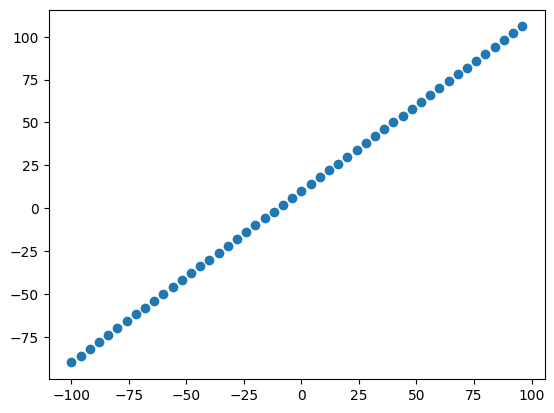

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...
**Training set** - the model learns from this data, which is typically 70-80% of the total data you have available

**Validation set** - the model gets tuned on this data, which typically 10-15% of the data available

**Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data availabe

In [ ]:
#Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test datasets
X_train = X[:40] #first 40 are the training samples(80% of the data)
y_train = y[:40]


X_test = X[40:] # last 10 are the testing samples(20% of the data)
y_test = y[40:]

len(X_train) , len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
**Now we have got our data in training and test set... let's visualize it again

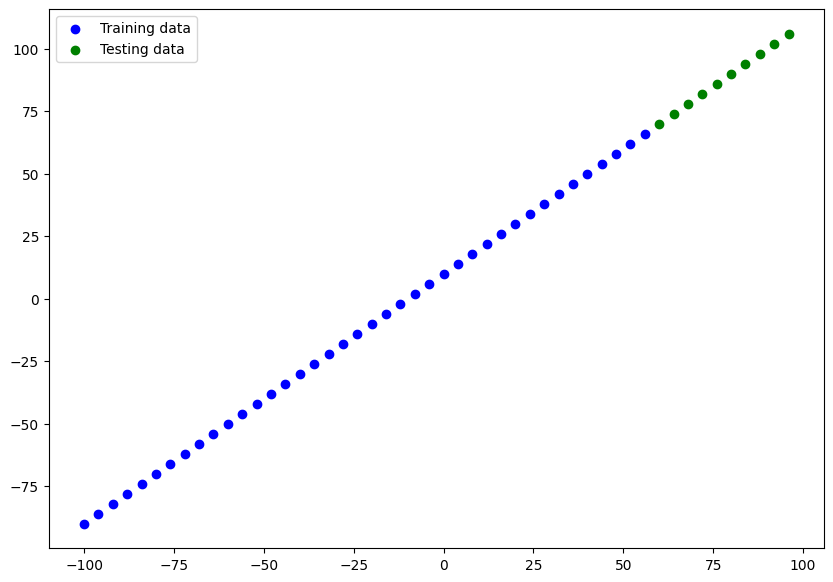

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# Let's have look at how to create a neural network of our data

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"] )


# 3. fit the model
#model.fit(X_train_shaped, y_train, epochs = 100)

In [ ]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
#Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1.Create a model
model = tf.keras.Sequential( [
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")], name = "model_1")

# 2. compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [ ]:
model.summary()

* Total param - total number of paramters in a model
* Trainable params - these are the params(patterns) the model can update as it trains
* Non-trainable params - this param aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **Transfer learning**)

📖 *Resource:* for a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠 *Exercise*: try playing around with the number of hidden units in the dense layers, see how that effects the number of parameters(total and trainable) by calling model.summary().

In [ ]:
# let's fit our model to the training data
model.fit(X_train , y_train , epochs=100, verbose = 0)

### model.summary() is like a quick health check for your model, helping you verify its structure, understand its complexity, and ensure everything is set up as you intended before you start training.

In [ ]:
# get a summary of a model
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes = True)

### Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test, y_true versus y_pred(ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

In [ ]:
y_test

**Note: ** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function

In [ ]:
import matplotlib.pyplot as plt
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
#Plots training data, test data and compare predictions to ground labels.

  plt.figure(figsize=(10,7))
# plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label = "Training data")
#plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label = "Testing data" )
#plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label = "Predictions")
#show the legend
  plt.legend();


In [ ]:
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE -  mean square error,"square the average errors

In [ ]:
#Evaluate the model on test
model.evaluate(X_test, y_test)

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred = tf.constant(y_pred))
mae

In [ ]:
tf.constant(y_pred)

In [ ]:
y_test

In [ ]:
tf.squeeze(y_pred)

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

In [ ]:
# Mean squared error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                        y_pred = tf.squeeze(y_pred))
def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred = tf.squeeze(y_pred))

mae, mse

### Running experiments to improve our model

```
Build a model ---> fit in --> evaluate it --> tweak it --> fit it --> evaluate it --> tweak it --> fit it --> evaluate it...
```

1. Get more data - get more example for your model to train on ( more opporutnities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layers.
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments
1. `model_1` : same as orignal model , 1 layer, trained for 100 epochs
2. `model_2` : 2 layers, trained for 100 epochs
2. `model_3` : 2 layers, trained for 500 epochs

**Build model_1**

In [ ]:
#set random seed
tf.random.set_seed(42)

#Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])
X_train_reshape = tf.reshape(X_train, shape=([40,1]))
y_train_reshape = tf.reshape(y_train, shape=([40,1]))



#fit the model
model_1.fit(X_train_reshape, y_train_reshape, epochs=100)

In [ ]:
# make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# calculate model_1 evaluation metrics
mae_1 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test,
            tf.squeeze(y_preds_1))
mae_1, mse_1

### Build model_2

* 2 densed layer, trained for 100 epochs

In [ ]:
# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])
X_train_reshape = tf.reshape(X_train, shape=([40,1]))
y_train_reshape = tf.reshape(y_train, shape=([40,1]))
# Fit the mode
model_2.fit(X_train_reshape,y_train_reshape, epochs=100)

In [ ]:
#make and plot predictionds for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
#calculate model_2 evaluation metrics
mae_2 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_2))
mse_2 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_preds_2))
mae_2, mse_2

### Build model_2

* 2 densed layer, trained for 500 epochs

In [ ]:
# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
X_train_reshape = tf.reshape(X_train, shape=([40,1]))

# Fit the mode
model_3.fit(X_train_reshape,y_train, epochs=500)

In [ ]:
#make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
#
mae_3 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_3))
mse_3 = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

🔑 *Note:* you want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

*Comparing the results of our experiments*

we've run a few experiments ,let's compare the results.

In [ ]:
#Let's compare our model's results using pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2" , mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

### looks like `model_2` performed best

In [ ]:
model_2.summary()

**NOTE**:  One of your main goals should be able to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the ML practisioner's motto: "Experiment, experiment, experiment"

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.
And when doing so, it can be tedious if you're running lots of experiments.
Luckily, there are tools to help us!

📖 *Resource:* As you build more models, You'll want to look into using:

* TensorBoard - a component of the tensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

### Saving our model

Saving our models allows us to use them outside of google colab(or wherver they were trained) such as in a web application or a mobile app

There are two main formats we can save our model's too:
1.  The SavedModel Format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
#Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")


### Loading the saved model

In [ ]:
#Load in the SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

In [ ]:
#Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format


In [ ]:
#load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

In [ ]:
model_2.summary()

In [ ]:
#Check to see if loaded.h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model

In [ ]:
#Compare mae of model_2_preds and loaded SavedModel_preds
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=y_test, y_pred=model_2_preds) == mean_absolute_error(y_true=y_test, y_pred=loaded_SavedModel_format)

In [ ]:
model_2_preds.squeeze() == loaded_SavedModel_format.squeeze()

In [ ]:
loaded_SavedModel_format.squeeze()

### Download a model (or any other file ) from google colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download"
2. use code(see te below cell)
3. save it to google drive by connecting google drive and copying it there(see 2nd code cell)

In [ ]:
# Download a file from google colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

In [ ]:
#Save a file from google ccolab to google drive(requires mounting google drive)
!cp /content/best_model_HDF5_format.h5  /content/drive/MyDrive/Tensorflow_course

In [ ]:
!ls /content/drive/MyDrive/Tensorflow_course

A larger example

In [ ]:
#Import arequired libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [ ]:
insurance["smoker"], insurance["age"]

In [ ]:
#Let's try to once-hot encode our dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

In [ ]:
# Create X & y values(features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X,y

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Creating training and testing datasets
from sklearn .model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)
len(X), len(X_train), len(X_test)

In [ ]:



# build a neural network ( sort of like model_2 above)
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train.astype('float32'), y_train.astype('float32'), epochs=100) # Use the correct model name 'insurance_model'

In [ ]:
# check the results of the insurance model
# Convert X_test and y_test to float32 NumPy arrays
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# check the results of the insurance model
insurance_model.evaluate(X_test, y_test)


### Right now it looks like our model isn't performing well...let's try to improve it

To try improve our model,we'll run 2 experiments
1. Add an extra layer with more hidden units and use Adam optimizer
2. Same as above but train for longer(200 epochs)
3. (insert your experiment here)

In [ ]:
X_train, y_train

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1.create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])
#3. fit the model
insurance_model_2.fit(X_train.astype('float32'),y_train.astype('float32'), epochs=100, verbose=1)

In [ ]:
#Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

In [ ]:
insurance_model.evaluate(X_train.astype('float32'), y_train.astype('float32'))

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])
#3. fit the model
history = insurance_model_3.fit(X_train.astype('float32'), y_train.astype('float32'), epochs=200)

In [ ]:
#evaluate the model
insurance_model_3.evaluate(X_test.astype('float32'), y_test.astype('float32'))

In [ ]:
insurance_model.evaluate(X_test.astype('float32'), y_test.astype('float32'))

In [ ]:
#Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long should you train for?

It depends. Reallyy... it depends on the problem you're working on. However, many people have asked this question before... so Tensorflow has a solution! It's called the EarlyStopping Callback which is a TensorFlow component you can add to your model to stop training on improving a certain metric.

### Preprocessing data(normalization and standardization)

In terms of scaling values, neural network tend to prefer normalization

If you're not sure which to use, you could try and see which performs better

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#create a column transformer
ct = make_column_transformer((MinMaxScaler(), ["age","bmi", "children"]),  # turn all  these values in the column between 0 and 1
                             (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker","region"]))

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# build our train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train) #ct.fit(X_train) makes the column transformer learn how to handle the different types of data in your training set.

#Transform the training and testing data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train) # makes a replica having some rules where all columns work perfectly
X_test_normal = ct.transform(X_test)


In [ ]:
#How our data looks like
X_train.loc[0]

In [ ]:
X_train_normal[0]

In [ ]:
X_train.shape, X_train_normal.shape

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it to see how it goes

In [ ]:
#Build a neural network model to fit on our normalized data
 # set random seed
tf.random.set_seed(42)

#1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile thhe model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

#3.fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

In [ ]:
#Evaluate our insurance_model_4 trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

In [ ]:
#Insurance model 2
#9/9 [==============================] - 0s 2ms/step - loss: 3484.7649 - mae: 3484.7649
#[3484.764892578125, 3484.764892578125]

In [ ]:
X

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()